In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data_withComGID.csv')

/var/folders/8t/0q92bs3s4pxc4tyvrgk1v07w0000gn/T/ipykernel_9952/1493899939.py:4: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_withComGID.csv')


In [2]:
# Define city-to-state mapping
city_to_state = {
    # New South Wales (NSW)
    'sydney': 'NSW', 'albury': 'NSW', 'armidale': 'NSW', 'bathurst': 'NSW', 'blue mountains': 'NSW',
    'broken hill': 'NSW', 'campbelltown': 'NSW', 'cessnock': 'NSW', 'dubbo': 'NSW', 'gosford': 'NSW',
    'goulburn': 'NSW', 'grafton': 'NSW', 'griffith': 'NSW', 'lithgow': 'NSW', 'lismore': 'NSW',
    'liverpool': 'NSW', 'maitland': 'NSW', 'newcastle': 'NSW', 'orange': 'NSW', 'parramatta': 'NSW',
    'penrith': 'NSW', 'queanbeyan': 'NSW', 'tamworth': 'NSW', 'wagga wagga': 'NSW', 'wollongong': 'NSW',
    'blacktown': 'NSW', 'canada bay': 'NSW', 'fairfield': 'NSW', 'hawkesbury': 'NSW',
    'lake macquarie': 'NSW', 'randwick': 'NSW', 'ryde': 'NSW', 'shellharbour': 'NSW',
    'shoalhaven': 'NSW', 'willoughby': 'NSW', 'bankstown': 'NSW', 'botany bay': 'NSW',
    'canterbury': 'NSW', 'greater taree': 'NSW', 'holroyd': 'NSW', 'hurstville': 'NSW',
    'rockdale': 'NSW',

    # Victoria (VIC)
    'melbourne': 'VIC', 'ararat': 'VIC', 'bairnsdale': 'VIC', 'ballarat': 'VIC', 'benalla': 'VIC',
    'bendigo': 'VIC', 'dandenong': 'VIC', 'frankston': 'VIC', 'geelong': 'VIC', 'hamilton': 'VIC',
    'horsham': 'VIC', 'latrobe': 'VIC', 'melton': 'VIC', 'mildura': 'VIC', 'sale': 'VIC',
    'shepparton': 'VIC', 'swan hill': 'VIC', 'wangaratta': 'VIC', 'warrnambool': 'VIC', 'wodonga': 'VIC',

    # Queensland (QLD)
    'brisbane': 'QLD', 'bundaberg': 'QLD', 'cairns': 'QLD', 'caloundra': 'QLD', 'gladstone': 'QLD',
    'gold coast': 'QLD', 'gympie': 'QLD', 'hervey bay': 'QLD', 'ipswich': 'QLD', 'logan': 'QLD',
    'mackay': 'QLD', 'maryborough': 'QLD', 'mount isa': 'QLD', 'rockhampton': 'QLD',
    'sunshine coast': 'QLD', 'toowoomba': 'QLD', 'townsville': 'QLD', 'charters towers': 'QLD',
    'redcliffe': 'QLD', 'redland': 'QLD', 'thuringowa': 'QLD', 'warwick': 'QLD',

    # South Australia (SA)
    'adelaide': 'SA', 'mount barker': 'SA', 'mount gambier': 'SA', 'murray bridge': 'SA',
    'port adelaide': 'SA', 'port augusta': 'SA', 'port pirie': 'SA', 'port lincoln': 'SA',
    'victor harbor': 'SA', 'whyalla': 'SA',

    # Western Australia (WA)
    'perth': 'WA', 'albany': 'WA', 'bunbury': 'WA', 'busselton': 'WA', 'fremantle': 'WA',
    'geraldton': 'WA', 'joondalup': 'WA', 'kalgoorlie': 'WA', 'karratha': 'WA', 'mandurah': 'WA',
    'rockingham': 'WA', 'armadale': 'WA', 'bayswater': 'WA', 'canning': 'WA', 'cockburn': 'WA',
    'gosnells': 'WA', 'kalamunda': 'WA', 'kwinana': 'WA', 'melville': 'WA', 'nedlands': 'WA',
    'south perth': 'WA', 'stirling': 'WA', 'subiaco': 'WA', 'swan': 'WA', 'wanneroo': 'WA',

    # Tasmania (TAS)
    'hobart': 'TAS', 'burnie': 'TAS', 'devonport': 'TAS', 'launceston': 'TAS', 'clarence': 'TAS',
    'glenorchy': 'TAS',

    # ACT
    'canberra': 'ACT',

    # Northern Territory (NT)
    'darwin': 'NT', 'palmerston': 'NT', 'alice springs': 'NT', 'katherine': 'NT'
}

In [5]:
# Define helper function to get cities
def get_state(location):
    if pd.isna(location):
        return 'Unknown'
    location = location.lower()
    for city, state in city_to_state.items():
        if city in location:
            return state
    return 'Unknown'

In [7]:
# Apply function to create new column 'State'
df['State'] = df['Location'].apply(get_state)

df[['Location', 'State']].sample(10)

Location    State
96305    Sydney      NSW
90404    Sydney      NSW
298169      NaN  Unknown
302048      NaN  Unknown
212766      NaN  Unknown
295682      NaN  Unknown
105769   Sydney      NSW
239375      NaN  Unknown
250567      NaN  Unknown
105223   Sydney      NSW

In [9]:
# Check NaN in Location
df[df['Location'].isna()]
df['Location'].isna().sum()


121248

In [11]:
# Check Unknown states
df[df['State'] == 'Unknown']['Location'].value_counts().head(30)

Location
ACT                                     6250
South West Coast VIC                    1790
Northern QLD                            1493
Mornington Peninsula & Bass Coast        739
Western QLD                              514
Yarra Valley & High Country              499
Port Macquarie & Mid North Coast         469
Southern Highlands & Tablelands          465
Coffs Harbour & North Coast              440
Broome & Kimberley                       283
Far West & North Central NSW             197
Mt Gambier & Limestone Coast             168
Northam & Wheatbelt                      160
Riverland & Murray Mallee                149
Coober Pedy & Outback SA                 112
Yorke Peninsula & Clare Valley            96
Tumut, Snowy & Monaro                     86
Somerset & Lockyer                        65
Fleurieu Peninsula & Kangaroo Island      64
Central & South East TAS                  57
Name: count, dtype: int64

In [13]:
df[df['Location'].isna() | (df['State'] == 'Unknown')][['Location', 'State']].value_counts().head(20)

Location                              State  
ACT                                   Unknown    6250
South West Coast VIC                  Unknown    1790
Northern QLD                          Unknown    1493
Mornington Peninsula & Bass Coast     Unknown     739
Western QLD                           Unknown     514
Yarra Valley & High Country           Unknown     499
Port Macquarie & Mid North Coast      Unknown     469
Southern Highlands & Tablelands       Unknown     465
Coffs Harbour & North Coast           Unknown     440
Broome & Kimberley                    Unknown     283
Far West & North Central NSW          Unknown     197
Mt Gambier & Limestone Coast          Unknown     168
Northam & Wheatbelt                   Unknown     160
Riverland & Murray Mallee             Unknown     149
Coober Pedy & Outback SA              Unknown     112
Yorke Peninsula & Clare Valley        Unknown      96
Tumut, Snowy & Monaro                 Unknown      86
Somerset & Lockyer                  

In [15]:
# Define city-to-state mapping
city_to_state = {
    # New South Wales (NSW)
    'sydney': 'NSW', 'albury': 'NSW', 'armidale': 'NSW', 'bathurst': 'NSW', 'blue mountains': 'NSW',
    'broken hill': 'NSW', 'campbelltown': 'NSW', 'cessnock': 'NSW', 'dubbo': 'NSW', 'gosford': 'NSW',
    'goulburn': 'NSW', 'grafton': 'NSW', 'griffith': 'NSW', 'lithgow': 'NSW', 'lismore': 'NSW',
    'liverpool': 'NSW', 'maitland': 'NSW', 'newcastle': 'NSW', 'orange': 'NSW', 'parramatta': 'NSW',
    'penrith': 'NSW', 'queanbeyan': 'NSW', 'tamworth': 'NSW', 'wagga wagga': 'NSW', 'wollongong': 'NSW',
    'blacktown': 'NSW', 'canada bay': 'NSW', 'fairfield': 'NSW', 'hawkesbury': 'NSW',
    'lake macquarie': 'NSW', 'randwick': 'NSW', 'ryde': 'NSW', 'shellharbour': 'NSW',
    'shoalhaven': 'NSW', 'willoughby': 'NSW', 'bankstown': 'NSW', 'botany bay': 'NSW',
    'canterbury': 'NSW', 'greater taree': 'NSW', 'holroyd': 'NSW', 'hurstville': 'NSW',
    'rockdale': 'NSW',

    # Victoria (VIC)
    'melbourne': 'VIC', 'ararat': 'VIC', 'bairnsdale': 'VIC', 'ballarat': 'VIC', 'benalla': 'VIC',
    'bendigo': 'VIC', 'dandenong': 'VIC', 'frankston': 'VIC', 'geelong': 'VIC', 'hamilton': 'VIC',
    'horsham': 'VIC', 'latrobe': 'VIC', 'melton': 'VIC', 'mildura': 'VIC', 'sale': 'VIC',
    'shepparton': 'VIC', 'swan hill': 'VIC', 'wangaratta': 'VIC', 'warrnambool': 'VIC', 'wodonga': 'VIC',

    # Queensland (QLD)
    'brisbane': 'QLD', 'bundaberg': 'QLD', 'cairns': 'QLD', 'caloundra': 'QLD', 'gladstone': 'QLD',
    'gold coast': 'QLD', 'gympie': 'QLD', 'hervey bay': 'QLD', 'ipswich': 'QLD', 'logan': 'QLD',
    'mackay': 'QLD', 'maryborough': 'QLD', 'mount isa': 'QLD', 'rockhampton': 'QLD',
    'sunshine coast': 'QLD', 'toowoomba': 'QLD', 'townsville': 'QLD', 'charters towers': 'QLD',
    'redcliffe': 'QLD', 'redland': 'QLD', 'thuringowa': 'QLD', 'warwick': 'QLD',

    # South Australia (SA)
    'adelaide': 'SA', 'mount barker': 'SA', 'mount gambier': 'SA', 'murray bridge': 'SA',
    'port adelaide': 'SA', 'port augusta': 'SA', 'port pirie': 'SA', 'port lincoln': 'SA',
    'victor harbor': 'SA', 'whyalla': 'SA',

    # Western Australia (WA)
    'perth': 'WA', 'albany': 'WA', 'bunbury': 'WA', 'busselton': 'WA', 'fremantle': 'WA',
    'geraldton': 'WA', 'joondalup': 'WA', 'kalgoorlie': 'WA', 'karratha': 'WA', 'mandurah': 'WA',
    'rockingham': 'WA', 'armadale': 'WA', 'bayswater': 'WA', 'canning': 'WA', 'cockburn': 'WA',
    'gosnells': 'WA', 'kalamunda': 'WA', 'kwinana': 'WA', 'melville': 'WA', 'nedlands': 'WA',
    'south perth': 'WA', 'stirling': 'WA', 'subiaco': 'WA', 'swan': 'WA', 'wanneroo': 'WA',

    # Tasmania (TAS)
    'hobart': 'TAS', 'burnie': 'TAS', 'devonport': 'TAS', 'launceston': 'TAS', 'clarence': 'TAS',
    'glenorchy': 'TAS',

    # ACT
    'canberra': 'ACT',

    # Northern Territory (NT)
    'darwin': 'NT', 'palmerston': 'NT', 'alice springs': 'NT', 'katherine': 'NT',

    # add more from missing Location
    'act': 'ACT',
    'coffs harbour': 'NSW',
    'port macquarie': 'NSW',
    'south west coast': 'VIC',
    'mornington peninsula': 'VIC',
    'yarra valley': 'VIC',
    'northern qld': 'QLD',
    'western qld': 'QLD',
    'mt gambier': 'SA',
    'broome': 'WA',
    'kimberley': 'WA',
    'clare valley': 'SA',
    'whyalla': 'SA',
    'limestone coast': 'SA',
    'murraylands': 'SA',
    'central tas': 'TAS',
    'north coast': 'NSW',
    'gippsland': 'VIC',
    'latrobe': 'VIC',
    'southern highlands': 'NSW',
    'tablelands': 'NSW',
    'far west': 'NSW',
    'north central': 'NSW',
    'northam': 'WA',
    'wheatbelt': 'WA',
    'riverland': 'SA',
    'murray': 'SA',
    'richmond': 'NSW',
    'hawksbury': 'NSW',
    'coober pedy': 'SA',
    'outback': 'SA',
    'clare valley': 'SA',
    'monaro': 'NSW',
    'lockyer': 'QLD',
    'kangaroo island': 'SA',
    'central tas': 'TAS',
    'clare valley': 'SA',
    'monaro': 'NSW',
    'lockyer': 'QLD',
    'kangaroo island': 'SA',
    'south east tas': 'TAS'
}

In [17]:
def get_state(location):
    if pd.isna(location):
        return 'Unknown'
    location = location.lower()

    # cut "&" ie "Hervey Bay & Fraser Coast" → "hervey bay"
    location = location.split("&")[0].strip()

    for city, state in city_to_state.items():
        if city in location:
            return state
    return 'Unknown'

# Apply function to create new column 'State'
df['State'] = df['Location'].apply(get_state)

df[['Location', 'State']].sample(10)

Location    State
115265                       Adelaide       SA
302341                            NaN  Unknown
178984                          Perth       WA
102288  Blue Mountains & Central West      NSW
246900                            NaN  Unknown
89456    Newcastle, Maitland & Hunter      NSW
1328                        Melbourne      VIC
147996                      Melbourne      VIC
177556                          Perth       WA
34267    Newcastle, Maitland & Hunter      NSW

In [19]:
df[df['Location'].isna() | (df['State'] == 'Unknown')][['Location', 'State']].value_counts().head(20)

Location                              State  
Yorke Peninsula & Clare Valley        Unknown    96
Tumut, Snowy & Monaro                 Unknown    86
Somerset & Lockyer                    Unknown    65
Fleurieu Peninsula & Kangaroo Island  Unknown    64
Central & South East TAS              Unknown    57
Name: count, dtype: int64

In [21]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 318477 non-null  object
 1   Title              318477 non-null  object
 2   Company            306473 non-null  object
 3   Date               318477 non-null  object
 4   Location           197229 non-null  object
 5   Area               122658 non-null  object
 6   Classification     197229 non-null  object
 7   SubClassification  197229 non-null  object
 8   Requirement        318470 non-null  object
 9   FullDescription    302302 non-null  object
 10  LowestSalary       318477 non-null  int64 
 11  HighestSalary      318477 non-null  int64 
 12  JobType            302379 non-null  object
 13  CompanyGroupID     313855 non-null  object
 14  State              318477 non-null  object
dtypes: int64(2), object(13)
memory usage: 36.4+ MB


Id                                              Title  \
0  37404348                           Casual Stock Replenisher   
1  37404337                           Casual Stock Replenisher   
2  37404356  RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...   
3  37404330                              Team member - Belrose   
4  37404308  Business Banking Contact Centre Specialist, Ni...   
5  37404307  Business Banking Contact Centre Specialist, Ni...   
6  37404355               Casual Café All-rounder in Semaphore   
7  37404350           Casual Café All-rounder in Woolloongabba   
8  37404301                                       Telemarketer   
9  37404286                       Casual Dish Hand in Brighton   

                                          Company                      Date  \
0                                     Aldi Stores  2018-10-07T00:00:00.000Z   
1                                     Aldi Stores  2018-10-07T00:00:00.000Z   
2                             LB Creative Pty Ltd  2018-10-07T00:00:00.000Z   
3                          Anaconda Group Pty Ltd  2018-10-07T00:00:00.000Z   
4  Commonwealth Bank - Business & Private Banking  2018-10-07T00:00:00.000Z   
5  Commonwealth Bank - Business & Private Banking  2018-10-07T00:00:00.000Z   
6                                      Jora Local  2018-10-07T00:00:00.000Z   
7                                      Jora Local  2018-10-07T00:00:00.000Z   
8                            Reventon Investments  2018-10-07T00:00:00.000Z   
9                                      Jora Local  2018-10-07T00:00:00.000Z   

                  Location                             Area  \
0                   Sydney      North West & Hills District   
1    Richmond & Hawkesbury                              NaN   
2                 Brisbane              CBD & Inner Suburbs   
3  Gosford & Central Coast                              NaN   
4                   Sydney            Ryde & Macquarie Park   
5                   Sydney            Ryde & Macquarie Park   
6                 Adelaide                              NaN   
7                 Brisbane              CBD & Inner Suburbs   
8                Melbourne              CBD & Inner Suburbs   
9                Melbourne  Bayside & South Eastern Suburbs   

                   Classification               SubClassification  \
0      Retail & Consumer Products               Retail Assistants   
1      Retail & Consumer Products               Retail Assistants   
2      Retail & Consumer Products               Retail Assistants   
3      Retail & Consumer Products               Retail Assistants   
4  Call Centre & Customer Service                 Sales - Inbound   
5  Call Centre & Customer Service  Customer Service - Call Centre   
6           Hospitality & Tourism                   Waiting Staff   
7           Hospitality & Tourism                   Waiting Staff   
8  Call Centre & Customer Service                Sales - Outbound   
9           Hospitality & Tourism        Kitchen & Sandwich Hands   

                                         Requirement FullDescription  \
0  Our Casual Stock Replenishers pride themselves...             NaN   
1  Our Casual Stock Replenishers pride themselves...             NaN   
2  BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA             NaN   
3  Bring it on - do you love the great outdoors a...             NaN   
4  We are seeking highly articulate, enthusiastic...             NaN   
5  We are seeking highly articulate, enthusiastic...             NaN   
6  A cafe/restaurant in Semaphore is seeking a ca...             NaN   
7  A cafe in Woolloongabba is seeking a casual Ca...             NaN   
8  Market leading investment & financial services...             NaN   
9  A restaurant in Brighton is seeking a casual D...             NaN   

   LowestSalary  HighestSalary JobType  \
0             0             30     NaN   
1             0             30     NaN   
2             0             30     NaN 

In [23]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Id                        0
Title                     0
Company               12004
Date                      0
Location             121248
Area                 195819
Classification       121248
SubClassification    121248
Requirement               7
FullDescription       16175
LowestSalary              0
HighestSalary             0
JobType               16098
CompanyGroupID         4622
State                     0
dtype: int64


In [25]:
unknown_count = len(df[df['State'] == 'Unknown'])
print("State with Unknown =", unknown_count)

State with Unknown = 121616


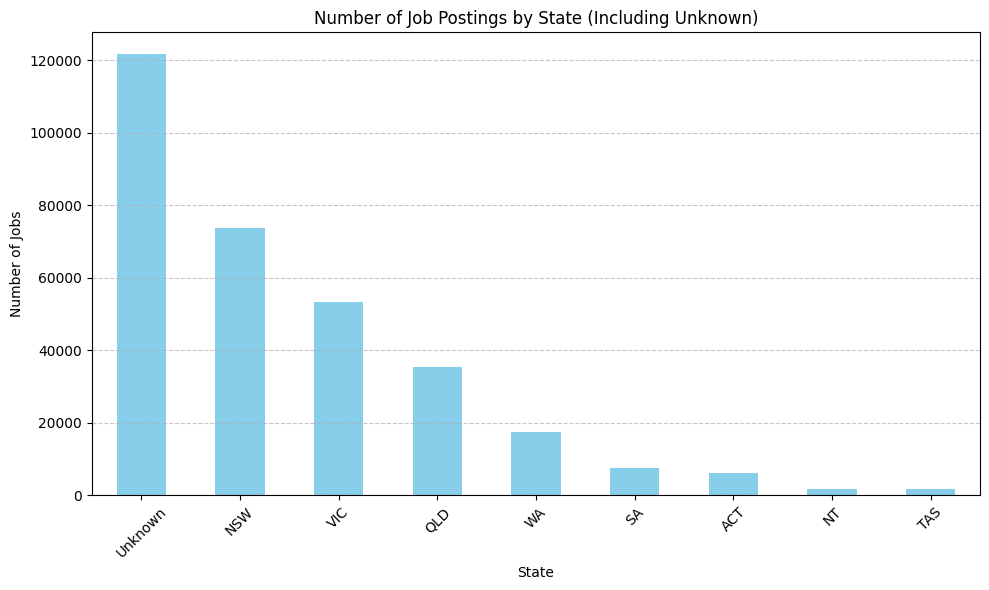

In [27]:
import matplotlib.pyplot as plt

# Count jobs by State
state_counts = df['State'].value_counts()

# Bar chart
plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Job Postings by State (Including Unknown)')
plt.xlabel('State')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

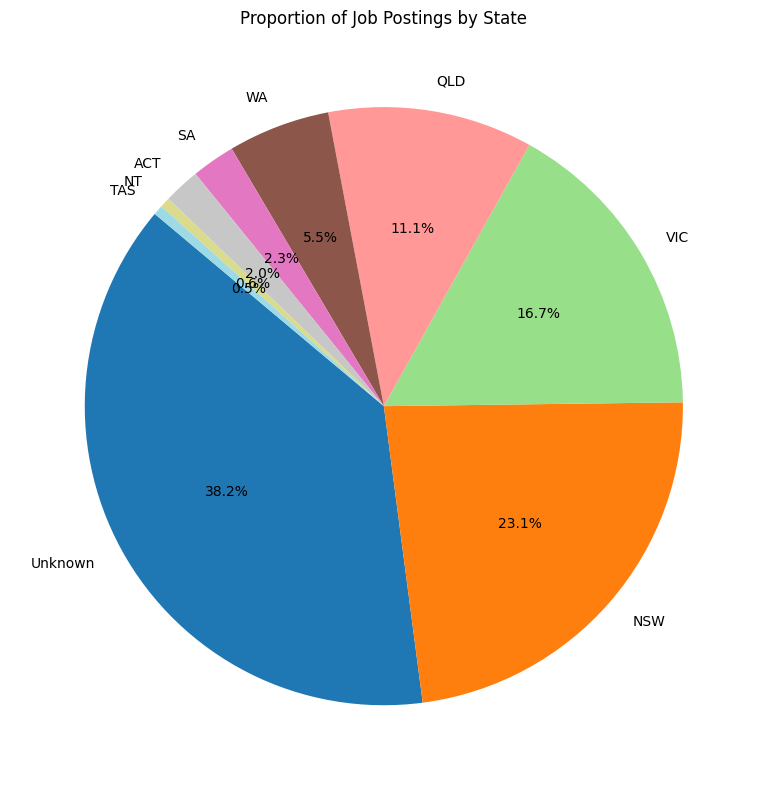

In [29]:
# Pie Chart comparing states
plt.figure(figsize=(8, 8))
state_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='tab20')
plt.title('Proportion of Job Postings by State')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [31]:
# View the “hub cities” in each state
df_hubs = df[~df['Location'].isna() & (df['State'] != 'Unknown')]

# create pivot counting Location each State
hub_cities = df_hubs.groupby(['State', 'Location']).size().reset_index(name='Count')

# get top cities each state
top_city_per_state = hub_cities.loc[hub_cities.groupby('State')['Count'].idxmax()]

print("Top city in each state (Hub Cities):")
print(top_city_per_state)


Top city in each state (Hub Cities):
   State   Location  Count
0    ACT        ACT   6250
12   NSW     Sydney  60765
17    NT     Darwin   1266
19   QLD   Brisbane  21466
31    SA   Adelaide   6653
38   TAS     Hobart   1051
44   VIC  Melbourne  46690
58    WA      Perth  13198


In [33]:
# Filter rows with known State and non-null Location
df_hubs = df[~df['Location'].isna() & (df['State'] != 'Unknown')]

# Count number of jobs by State and Location
hub_cities = df_hubs.groupby(['State', 'Location']).size().reset_index(name='Count')

# Sort and get top 3 cities per state
top3_city_per_state = (
    hub_cities.sort_values(['State', 'Count'], ascending=[True, False])
    .groupby('State')
    .head(3)
    .reset_index(drop=True)
)

print("Top 3 cities in each state (Hub Cities):")
print(top3_city_per_state)

Top 3 cities in each state (Hub Cities):
   State                              Location  Count
0    ACT                                   ACT   6250
1    NSW                                Sydney  60765
2    NSW          Newcastle, Maitland & Hunter   3958
3    NSW   Wollongong, Illawarra & South Coast   1657
4     NT                                Darwin   1266
5     NT     Alice Springs & Central Australia    301
6     NT        Katherine & Northern Australia    187
7    QLD                              Brisbane  21466
8    QLD                            Gold Coast   3588
9    QLD                   Mackay & Coalfields   1701
10    SA                              Adelaide   6653
11    SA              Whyalla & Eyre Peninsula    201
12    SA              Adelaide Hills & Barossa    193
13   TAS                                Hobart   1051
14   TAS               Launceston & North East    388
15   TAS                Devonport & North West    256
16   VIC                             Melb

In [35]:
# Circle Packing Chart
!pip install plotly

In [36]:
!pip install circlify

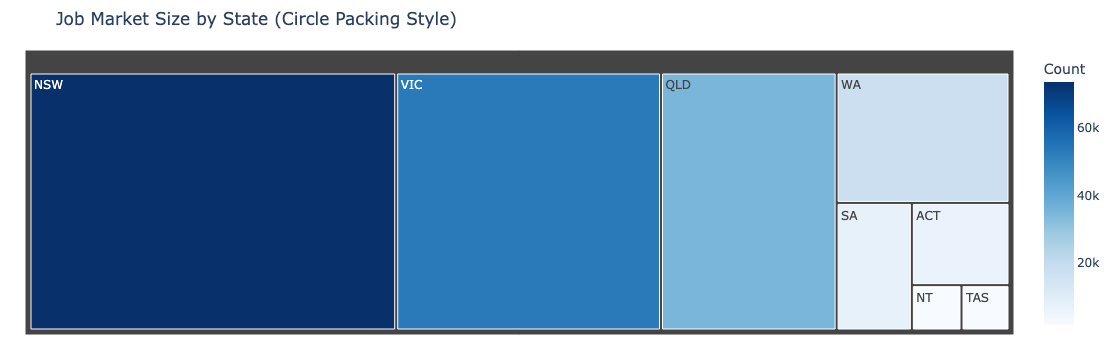

In [39]:
import plotly.express as px

# เตรียมข้อมูลให้รวมจำนวนงานต่อ State
state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

# กรองเฉพาะที่ไม่ใช่ Unknown
state_counts = state_counts[state_counts['State'] != 'Unknown']

# สร้าง chart
fig = px.treemap(
    state_counts,
    path=['State'],
    values='Count',
    color='Count',
    color_continuous_scale='Blues',
    title='Job Market Size by State (Circle Packing Style)'
)

fig.update_traces(root_color="lightgrey")
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

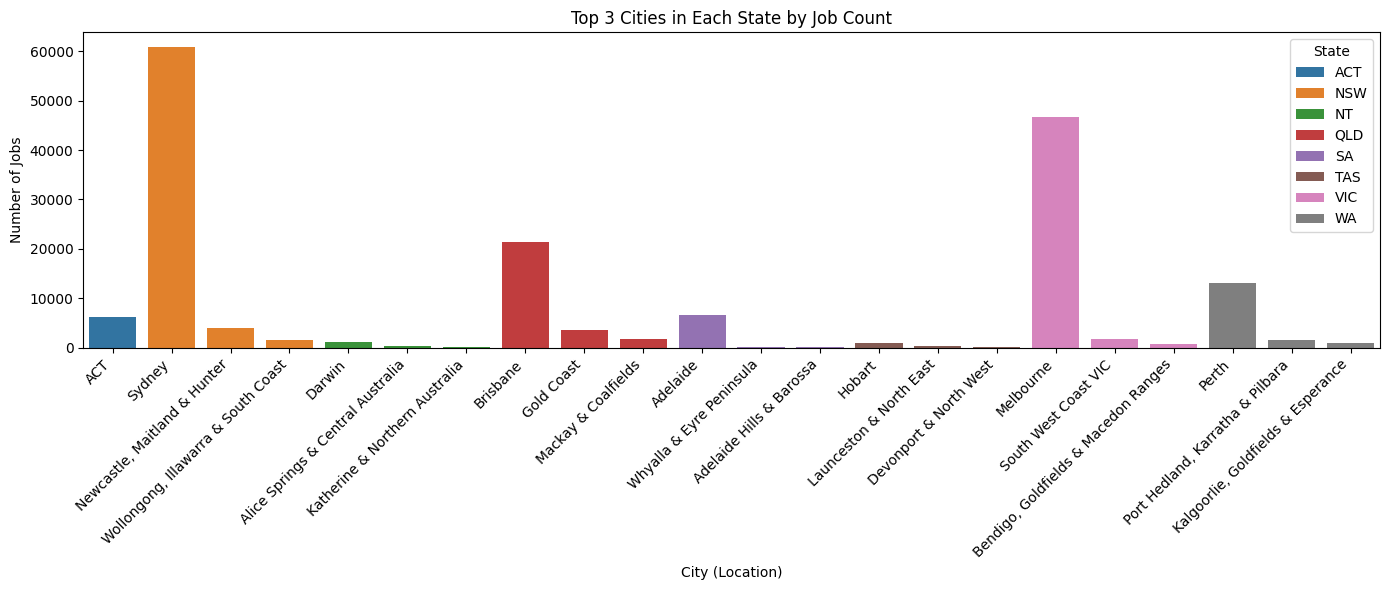

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# ใช้จาก top3_city_per_state ที่เราสร้างไว้
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top3_city_per_state,
    x='Location',
    y='Count',
    hue='State',
    dodge=False,
    palette='tab10'
)

plt.title('Top 3 Cities in Each State by Job Count')
plt.xlabel('City (Location)')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='State')
plt.show()

In [138]:
!pip install -U kaleido

/var/folders/8t/0q92bs3s4pxc4tyvrgk1v07w0000gn/T/ipykernel_9952/2863018164.py:25: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



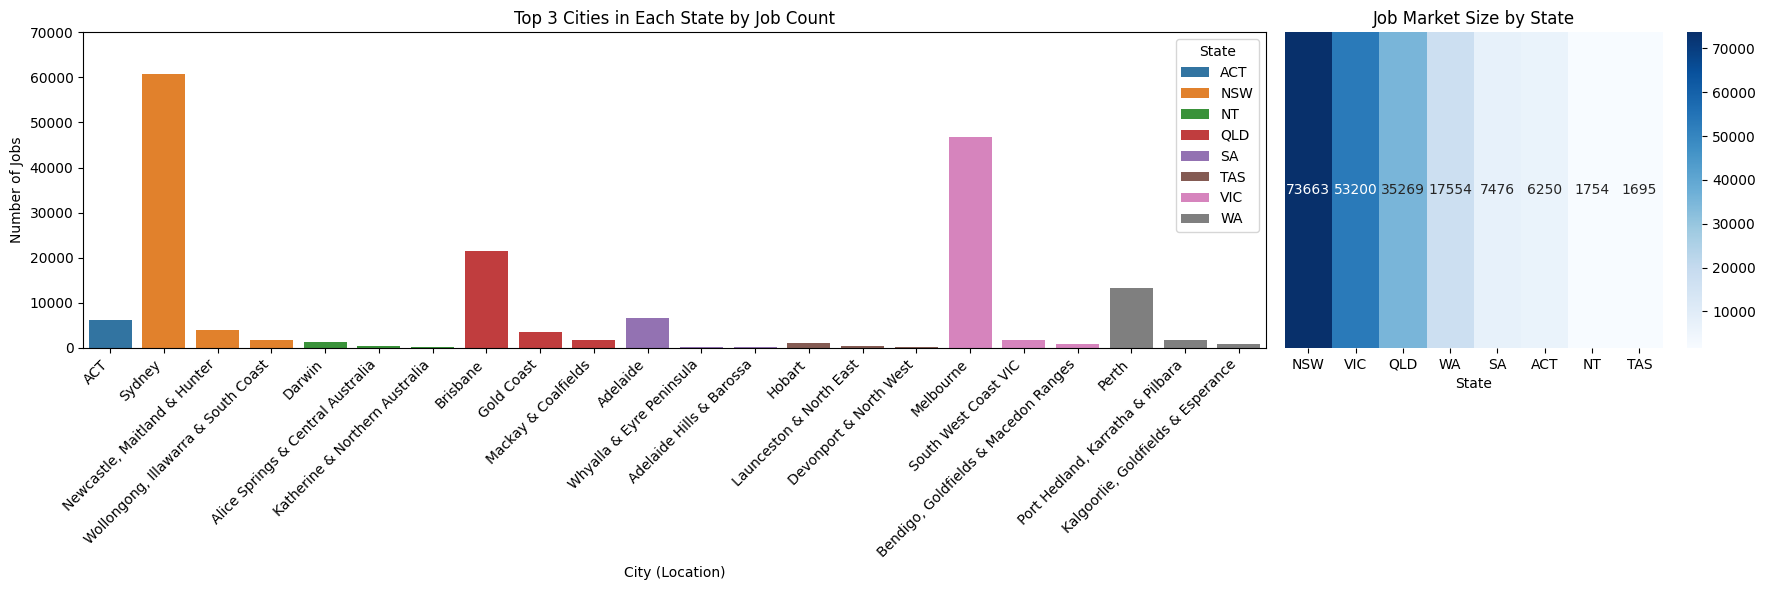

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# เตรียมข้อมูล Heatmap สำหรับรัฐ
state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']
state_counts = state_counts[state_counts['State'] != 'Unknown']

# สร้าง layout 1 row 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [2.5, 1]})

# --------- Bar chart for Top 3 Cities ---------
sns.barplot(
    data=top3_city_per_state,
    x='Location',
    y='Count',
    hue='State',
    dodge=False,
    palette='tab10',
    ax=ax1
)
ax1.set_title('Top 3 Cities in Each State by Job Count')
ax1.set_xlabel('City (Location)')
ax1.set_ylabel('Number of Jobs')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.legend(title='State')
ax1.set_ylim(0, 70000)

# --------- Heatmap for State Job Size ---------
sns.heatmap(
    state_counts[['Count']].T,  # Transpose for horizontal heatmap
    cmap='Blues',
    cbar=True,
    annot=True,
    fmt='g',
    xticklabels=state_counts['State'],
    ax=ax2
)
ax2.set_title('Job Market Size by State')
ax2.set_yticks([])  # ซ่อนแกน y
ax2.set_xlabel('State')

plt.tight_layout()
plt.show()

In [45]:
df['CompanyGroupID'].value_counts(dropna=False).head(20)

CompanyGroupID
Jora Local                                                                          9354
NaN                                                                                 4622
Hudson                                                                              1668
Design & Build                                                                      1547
Robert Walters                                                                      1385
Paxus                                                                               1325
Talent – Winner ‘Seek Large Recruitment Agency of the Year’ 3 consecutive years!    1280
Chandler Macleod Group                                                              1252
Programmed Skilled Workforce                                                        1211
Hays Accountancy & Finance                                                          1148
Hays Trades & Labour                                                                1057
Hays O

In [47]:
print(df['CompanyGroupID'].count())

313855


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 318477 non-null  object
 1   Title              318477 non-null  object
 2   Company            306473 non-null  object
 3   Date               318477 non-null  object
 4   Location           197229 non-null  object
 5   Area               122658 non-null  object
 6   Classification     197229 non-null  object
 7   SubClassification  197229 non-null  object
 8   Requirement        318470 non-null  object
 9   FullDescription    302302 non-null  object
 10  LowestSalary       318477 non-null  int64 
 11  HighestSalary      318477 non-null  int64 
 12  JobType            302379 non-null  object
 13  CompanyGroupID     313855 non-null  object
 14  State              318477 non-null  object
dtypes: int64(2), object(13)
memory usage: 36.4+ MB


In [51]:
# CompanyGroupID ที่พบมากในแต่ละรัฐ/เมือง
# Group by State + CompanyGroupID แล้วนับจำนวน
company_by_state = df.groupby(['State', 'CompanyGroupID']).size().reset_index(name='Count')

# ดึงค่าที่มากที่สุดต่อ State
top_companygroup_per_state = company_by_state.loc[company_by_state.groupby('State')['Count'].idxmax()]

# แสดงผล
print("Most common CompanyGroupID per state:")
display(top_companygroup_per_state)

Most common CompanyGroupID per state:


State     CompanyGroupID  Count
648        ACT             Hudson    131
6853       NSW         Jora Local   2447
13212       NT  Employment Office     58
17354      QLD         Jora Local    736
23287       SA        S.A. Health    219
24020      TAS        Company_TAS     38
35170  Unknown         Jora Local   2795
51707      VIC         Jora Local   2833
58891       WA         Jora Local    280

In [53]:
# Filter เฉพาะแถวที่มี Location และไม่ Unknown
df_city = df[~df['Location'].isna() & (df['State'] != 'Unknown')]

# Group by Location + CompanyGroupID แล้วนับ
company_by_city = df_city.groupby(['Location', 'CompanyGroupID']).size().reset_index(name='Count')

# ดึง CompanyGroupID ที่พบบ่อยที่สุดในแต่ละเมือง
top_companygroup_per_city = company_by_city.loc[company_by_city.groupby('Location')['Count'].idxmax()]

print("Most common CompanyGroupID per city:")
display(top_companygroup_per_city.head(20))  # ดูเฉพาะเมืองหลัก

Most common CompanyGroupID per city:


Location  \
648                                     ACT   
3094                               Adelaide   
3669               Adelaide Hills & Barossa   
3791                Albany & Great Southern   
3984                            Albury Area   
4083      Alice Springs & Central Australia   
4264                 Bairnsdale & Gippsland   
4412           Ballarat & Central Highlands   
4841   Bendigo, Goldfields & Macedon Ranges   
5214          Blue Mountains & Central West   
7914                               Brisbane   
10646                    Broome & Kimberley   
10809                  Bunbury & South West   
11163          Bundaberg & Wide Bay Burnett   
11239                    Cairns & Far North   
11847           Coffs Harbour & North Coast   
11938              Coober Pedy & Outback SA   
12157                                Darwin   
12631                Devonport & North West   
12753                   Dubbo & Central NSW   

                                        CompanyGroupID  Count  
648                                             Hudson    131  
3094                                       S.A. Health    134  
3669                                  Fuse Recruitment     13  
3791                                 NES Global Talent      7  
3984                Murrumbidgee Local Health District     20  
4083                              Central Land Council     19  
4264                               Federation Training     29  
4412                          Ballarat Health Services     31  
4841                                        Jora Local     75  
5214                                        Jora Local     43  
7914                                        Jora Local    314  
10646                               Sugarman Australia     17  
10809                                       Jora Local     24  
11163             Wide Bay Hospital and Health Service     40  
11239  Cairns & Hinterland Hospital and Health Service    108  
11847                                       Jora Local     19  
11938                               BHP Billiton Group     15  
12157                                Employment Office     36  
12631                         Tasmanian Health Service      9  
12753              Glencore Australia Holdings Pty Ltd     14

In [55]:
# Group และนับจำนวน
grouped = df.groupby(['State', 'CompanyGroupID']).size().reset_index(name='Count')

# ดึง Top 3 CompanyGroupID ต่อ State
top5_per_state = (
    grouped.sort_values(['State', 'Count'], ascending=[True, False])
    .groupby('State')
    .head(3)
)

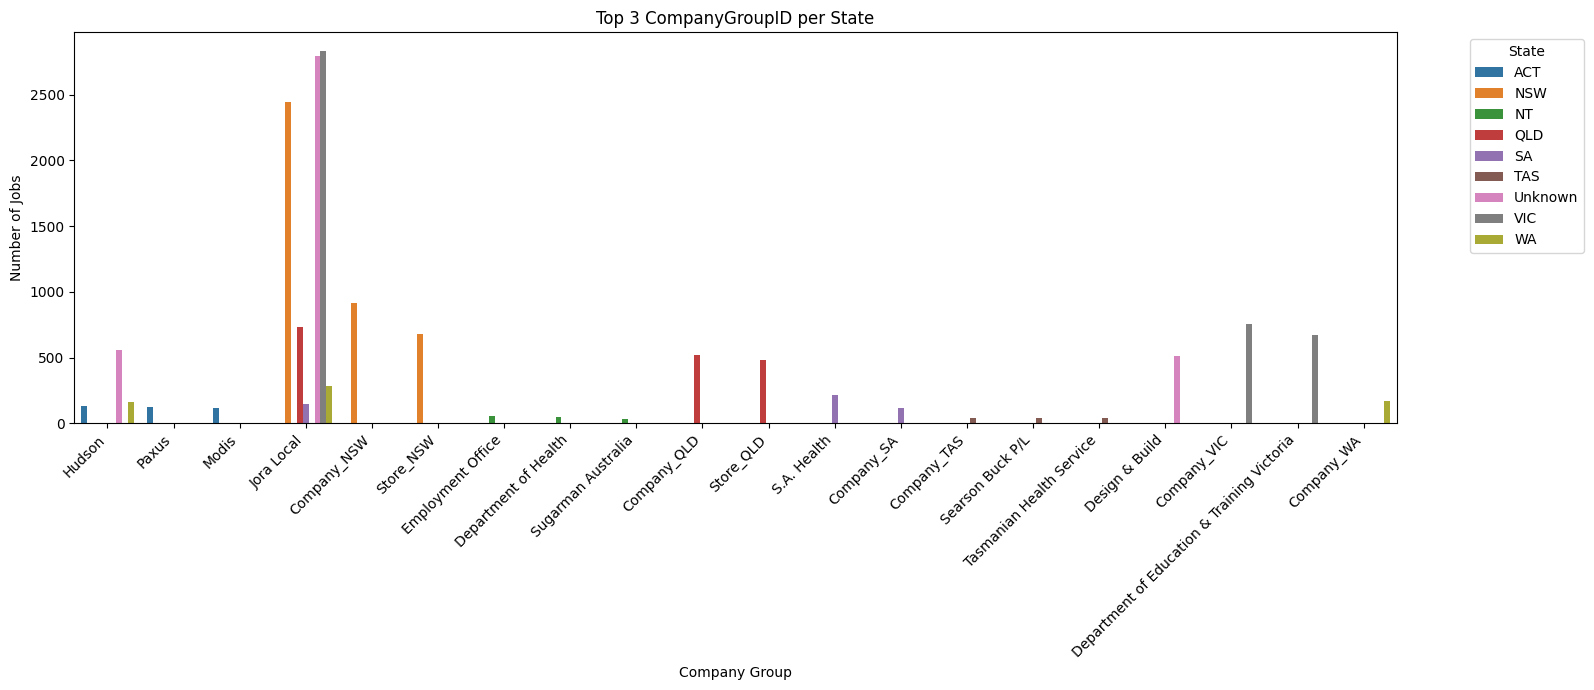

In [57]:
# Bar Chart: Top 3 CompanyGroupID per State
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 7))
sns.barplot(
    data=top5_per_state,
    x='CompanyGroupID',
    y='Count',
    hue='State',
    dodge=True
)
plt.title('Top 3 CompanyGroupID per State')
plt.xlabel('Company Group')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

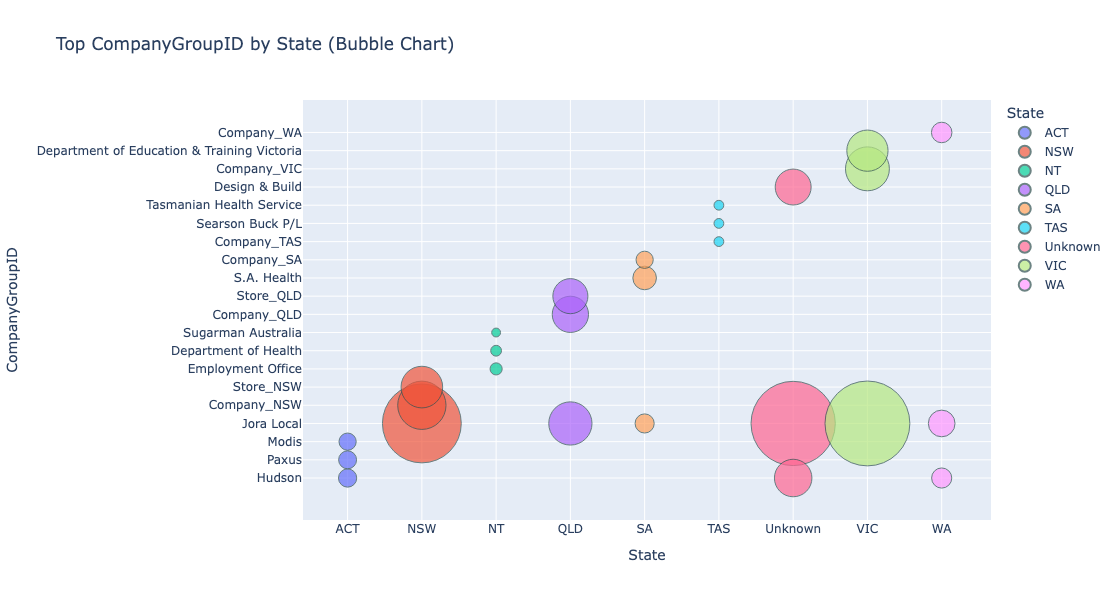

In [59]:
# Top CompanyGroupID by State (Bubble Chart)
import plotly.express as px

# ใช้ top3_per_state ที่เตรียมไว้แล้ว
fig = px.scatter(
    top5_per_state,
    x='State',
    y='CompanyGroupID',
    size='Count',
    color='State',
    title='Top CompanyGroupID by State (Bubble Chart)',
    size_max=60
)

fig.update_traces(marker=dict(opacity=0.7, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(height=600)
fig.show()

In [61]:
# Compare LowestSalary and HighestSalary Averages by State
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
states = salary_avg['State']
lowest = salary_avg['LowestSalary']
highest = salary_avg['HighestSalary']
gap = highest - lowest
gap_pct = ((gap / lowest) * 100).round(1)

x = np.arange(len(states))
width = 0.35  # narrower for side-by-side

fig, ax = plt.subplots(figsize=(12, 6))

# Left bar: Lowest + Gap (stacked)
bar_low = ax.bar(x - width/2, lowest, width, label='Lowest Salary', color='#66c2a5')
bar_gap = ax.bar(x - width/2, gap, width, bottom=lowest, label='Salary Gap', color='#fc8d62')

# Right bar: Highest only
bar_high = ax.bar(x + width/2, highest, width, label='Highest Salary', color='#8da0cb')

# Add % gap label above stacked bar
for i in range(len(states)):
    # height = lowest[i] + gap[i]
    ax.text(x[i] - width/2, lowest[i] + gap[i]/2, f"{gap_pct[i]}%", ha='center', fontsize=9, fontweight='bold')

# Labeling
ax.set_ylabel('Salary ($)')
ax.set_xlabel('State')
ax.set_title('Stacked Salary vs Highest Salary by State (+ % Salary Gap)')
ax.set_xticks(x)
ax.set_xticklabels(states)
ax.legend()
ax.grid(axis='y')
plt.tight_layout()
plt.show()

NameError: name 'salary_avg' is not defined

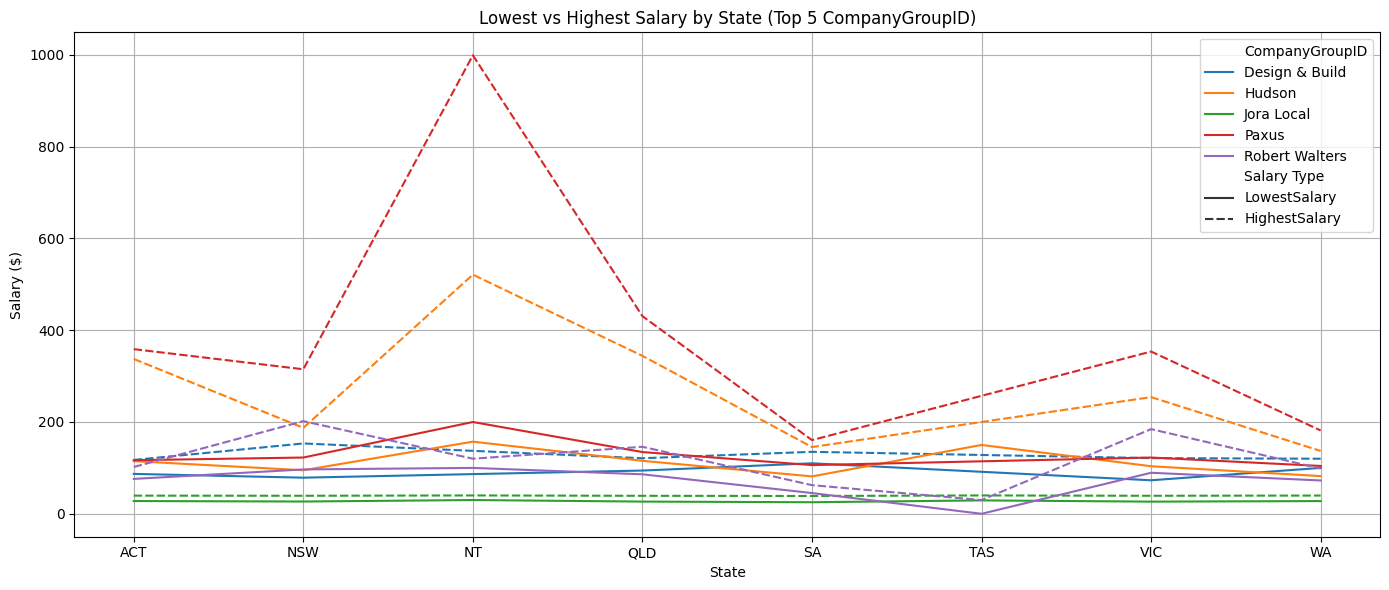

In [63]:
# Filter for top CompanyGroupID
top_groups = df['CompanyGroupID'].value_counts().head(5).index.tolist()
filtered = df[(df['CompanyGroupID'].isin(top_groups)) & (df['State'] != 'Unknown')]

# Group and average both salaries
grouped_salaries = (
    filtered.groupby(['State', 'CompanyGroupID'])[['LowestSalary', 'HighestSalary']]
    .mean()
    .reset_index()
)

# Melt for plotting
melted = grouped_salaries.melt(id_vars=['State', 'CompanyGroupID'], 
                               var_name='Salary Type', 
                               value_name='Average Salary')

plt.figure(figsize=(14, 6))
sns.lineplot(data=melted, x='State', y='Average Salary', hue='CompanyGroupID', style='Salary Type',)
plt.title('Lowest vs Highest Salary by State (Top 5 CompanyGroupID)')
plt.xlabel('State')
plt.ylabel('Salary ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

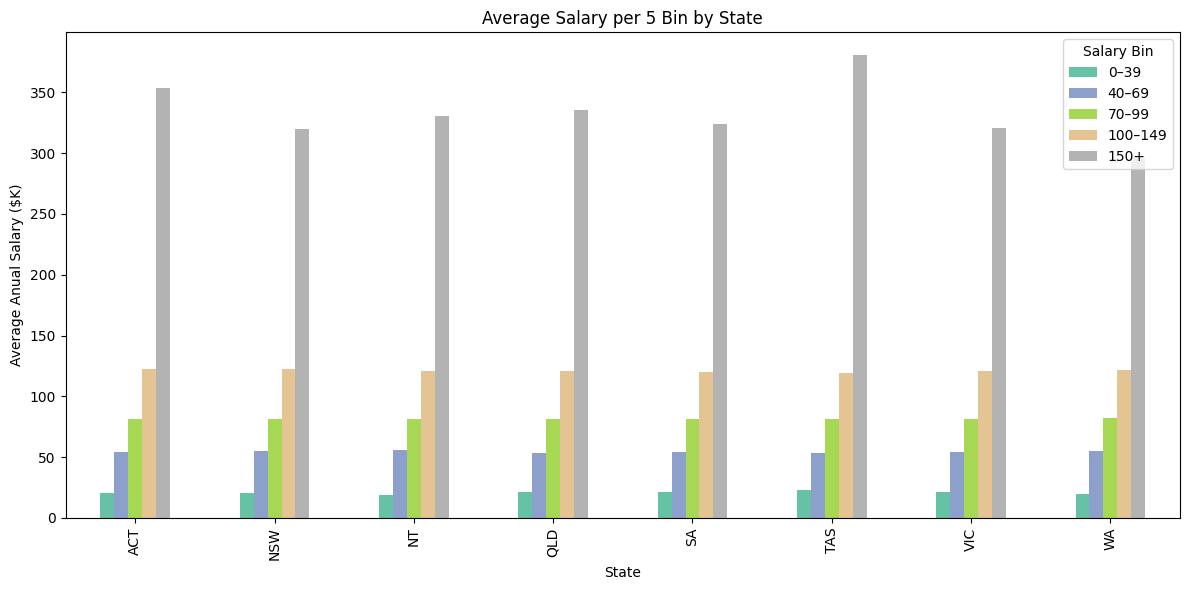

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# set bins and labels
bins = [0, 39, 69, 99, 149, float('inf')]
labels = ['0–39', '40–69', '70–99', '100–149', '150+']

# exclude Unknown
df_valid = df[df['State'] != 'Unknown'].copy()

# mean LowestSalary และ HighestSalary
df_valid['AvgSalary'] = (df_valid['LowestSalary'] + df_valid['HighestSalary']) / 2

# salary bins interval
df_valid['SalaryBin'] = pd.cut(df_valid['AvgSalary'], bins=bins, labels=labels)

# avg salary ต่อ State และ SalaryBin
avg_salary_per_bin = (
    df_valid
    .groupby(['State', 'SalaryBin'], observed=True)['AvgSalary']
    .mean()
    .unstack()
    .fillna(0)  # เติม 0 หากไม่มีข้อมูลในบาง bin
)

avg_salary_per_bin.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('Average Salary per 5 Bin by State')
plt.xlabel('State')
plt.ylabel('Average Anual Salary ($K)')
plt.legend(title='Salary Bin')
plt.tight_layout()
plt.show()


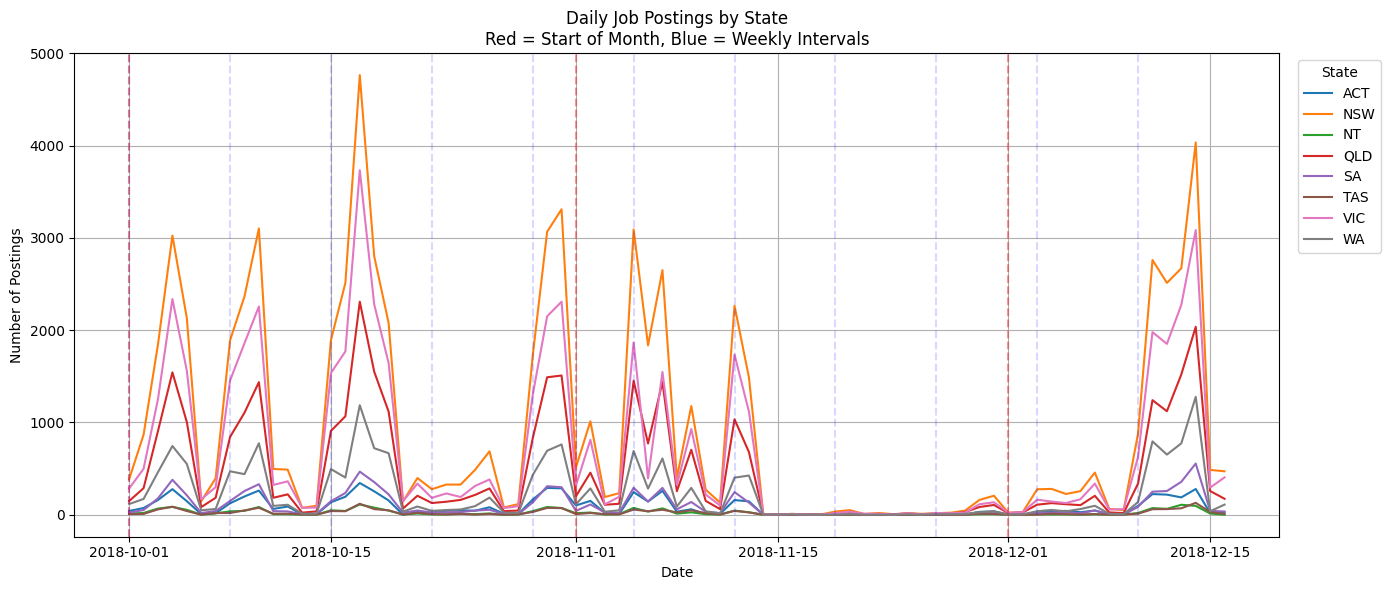

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure Date is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter out Unknown states
df_valid_states = df[df['State'] != 'Unknown']

# Group by Date and State
grouped_states = df_valid_states.groupby([df_valid_states['Date'].dt.date, 'State']).size().unstack(fill_value=0)

# Get red lines (1st of each month)
month_starts = pd.date_range(start=grouped_states.index.min(), end=grouped_states.index.max(), freq='MS')

# Get blue lines (every 7 days)
week_starts = pd.date_range(start=grouped_states.index.min(), end=grouped_states.index.max(), freq='7D')

# Plot
plt.figure(figsize=(14, 6))

# Plot state lines
for state in grouped_states.columns:
    plt.plot(grouped_states.index, grouped_states[state], label=state)

# Red lines: Start of month
for date in month_starts:
    plt.axvline(x=date, color='red', linestyle='--', alpha=0.4)

# Blue lines: Every 7 days
for date in week_starts:
    plt.axvline(x=date, color='blue', linestyle='--', alpha=0.15)

# Labels and layout
plt.title('Daily Job Postings by State\nRed = Start of Month, Blue = Weekly Intervals')
plt.xlabel('Date')
plt.ylabel('Number of Postings')
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1), title='State')
plt.grid(True)
plt.tight_layout()
plt.show()

In [277]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 1.1 MB/s eta 0:00:0000:0100:01m
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [79]:
# Requirements that are commonly found in each state
# Only nouns and adjectives from each state's requirements are selected before being entered into TfidfVectorizer. 
# use spaCy to do word tagging and POS tagging.

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

# โหลดสิ่งที่จำเป็น
nltk.download('punkt')
nltk.download('stopwords')

# โหลด spaCy ภาษาอังกฤษ
nlp = spacy.load("en_core_web_sm")

# เตรียมข้อมูล
df_req = df[df['Requirement'].notna() & df['State'].notna() & (df['State'] != 'Unknown')].copy()

# Tokenize
df_req['tokens'] = df_req['Requirement'].apply(lambda x: word_tokenize(str(x)))

# Remove punctuation
df_req['alphanumeric'] = df_req['tokens'].apply(lambda row: [word for word in row if word.isalpha()])

# Remove stopwords
stop = stopwords.words('english')
df_req['filtered'] = df_req['alphanumeric'].apply(lambda row: [word for word in row if word.lower() not in stop])

# Join back to sentence
df_req['filtered_text'] = df_req['filtered'].apply(lambda row: ' '.join(row))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chanutdamanosorn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chanutdamanosorn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:
texts = df_req['filtered_text'].tolist()

noun_adj_list = []
for doc in nlp.pipe(texts, disable=['ner', 'parser'], batch_size=1000):
    noun_adj = ' '.join([token.lemma_ for token in doc if token.pos_ in ['NOUN', 'ADJ']])
    noun_adj_list.append(noun_adj)

df_req['noun_adj_text'] = noun_adj_list

In [85]:
def get_top_keywords_tfidf(df, text_col='noun_adj_text', group_col='State', top_n=20):
    result = {}
    for state, group in df.groupby(group_col):
        texts = group[text_col].tolist()
        vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
        X = vectorizer.fit_transform(texts)
        vocab = vectorizer.get_feature_names_out()
        tfidf_scores = X.mean(axis=0).A1
        top_keywords = pd.Series(tfidf_scores, index=vocab).sort_values(ascending=False).head(top_n)
        result[state] = top_keywords.index.tolist()
    return pd.DataFrame(result)

top_keywords_filtered = get_top_keywords_tfidf(df_req)
top_keywords_filtered

ACT          NSW           NT          QLD           SA  \
0          team         team         team         team         team   
1   opportunity  opportunity       career  opportunity  opportunity   
2      contract         role  opportunity         role         role   
3        client         work          new         work         work   
4          role         hour         work     exciting     exciting   
5          work         time         role     position      service   
6       project      company    territory         time  experienced   
7    experience     exciting     position         join   experience   
8      exciting   experience      service   experience         time   
9         month         week       client  experienced     position   
10      service      project  experienced    available       client   
11   government     business   experience      service         join   
12  experienced       career     exciting        great    available   
13          new        great         time       career       career   
14     position       client         join         hour        great   
15     business      service      project         week      company   
16        large         join        place       client         hour   
17         time     contract    available          new       casual   
18       career  experienced        great      company     customer   
19        great          new      support      project          new   

             TAS          VIC           WA  
0           team         team         team  
1    opportunity  opportunity  opportunity  
2           role         time         role  
3           join         hour         work  
4           work         week  experienced  
5       position         role   experience  
6           time         work         join  
7    experienced     exciting     position  
8       exciting   experience     exciting  
9         career       casual         time  
10       service     business      project  
11     available  experienced       client  
12    experience      service      company  
13         great        great      service  
14      customer      project    available  
15        casual       client     contract  
16  enthusiastic      company       roster  
17     qualified       career         hour  
18     permanent         join        great  
19       support     position         week

In [89]:
!pip install wordcloud

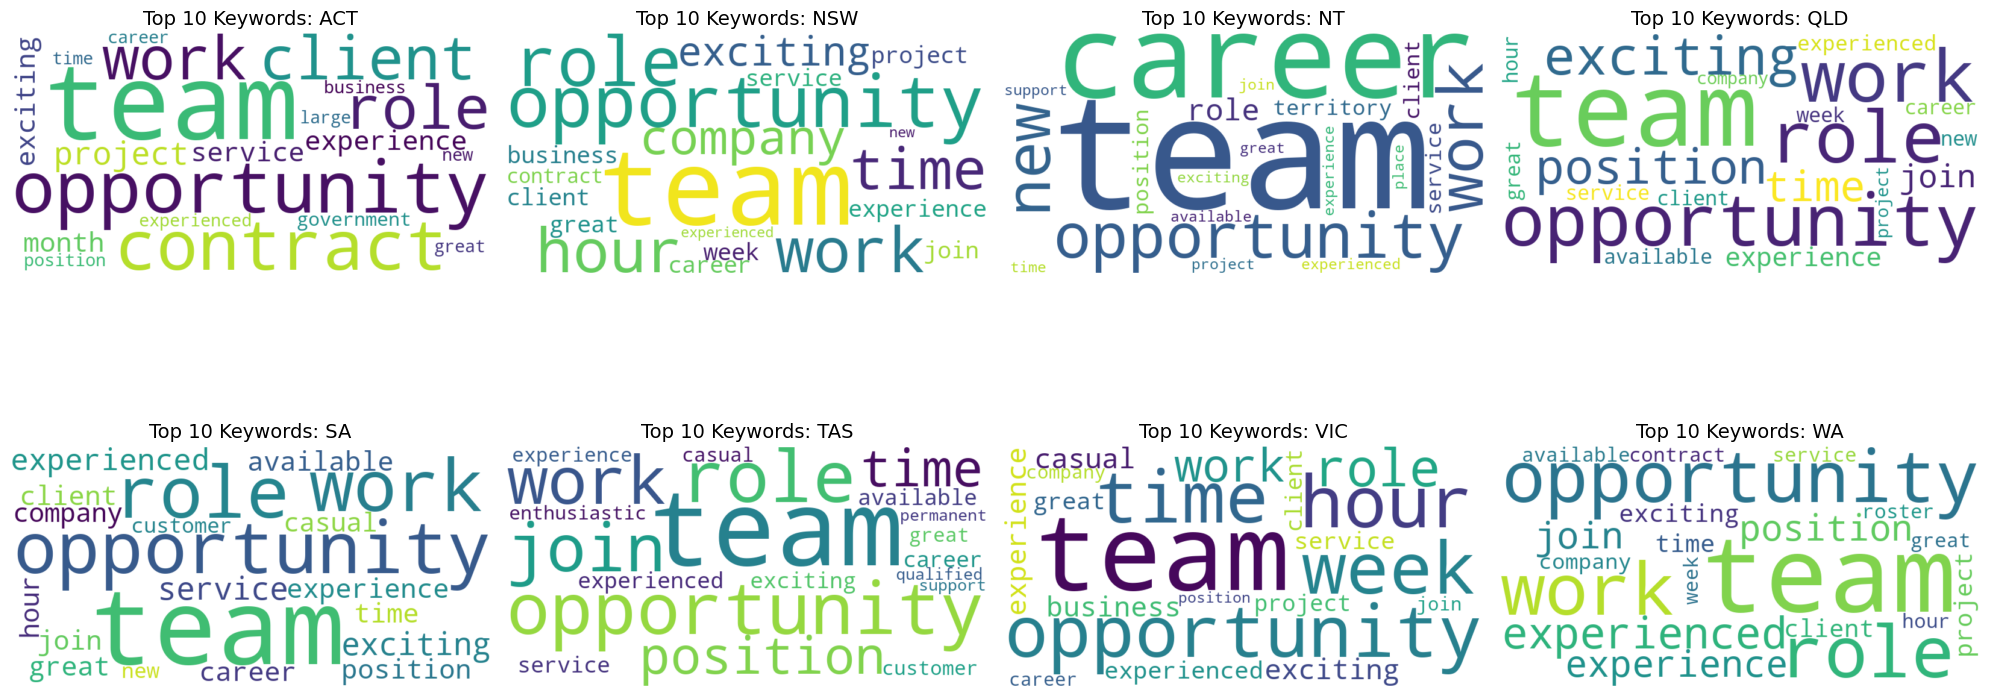

In [130]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# เตรียมข้อมูลเฉพาะ top 10 คำจากแต่ละรัฐ
top_keywords = top_keywords_filtered.head(20)

# สร้าง wordcloud แยกรัฐ
states = top_keywords.columns
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 8 รัฐ แสดงเป็น 2 แถว

for i, state in enumerate(states):
    words = ' '.join(top_keywords[state].dropna().tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
    ax = axes[i // 4, i % 4]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Top 10 Keywords: {state}', fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [99]:
df.columns

Index(['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType', 'CompanyGroupID', 'State'],
      dtype='object')

In [132]:
# Links between terms wage rate per requirement

df['AvgSalary'] = (df['LowestSalary'] + df['HighestSalary']) / 2

In [134]:
import numpy as np

def avg_salary_by_keyword(df, keyword_list, text_col='Requirement'):
    results = []
    for word in keyword_list:
        mask = df[text_col].str.contains(fr'\b{word}\b', case=False, na=False)
        avg_salary = df.loc[mask, 'AvgSalary'].mean()
        count = mask.sum()
        results.append({'Keyword': word, 'AvgSalary': avg_salary, 'Count': count})
    return pd.DataFrame(results).sort_values(by='AvgSalary', ascending=False)

all_keywords = top_keywords_filtered.head(20).values.flatten().tolist()
important_terms = list(set([w for w in all_keywords if isinstance(w, str)]))

salary_by_kw = avg_salary_by_keyword(df_req_group, important_terms)
salary_by_kw

Keyword   AvgSalary  Count
4       contract  157.542071  14131
8     government  157.216629   5791
17       project  154.767006  14818
26         large  151.756641   6776
13         month  149.085146   8227
14      business  114.077260  21939
1         client  109.584589  12348
23     territory  107.948433    766
28           new   99.379763  16193
25          role   98.089527  32800
3     experience   96.231236  21158
0    opportunity   95.568527  52417
2       exciting   94.423159  20087
19        roster   92.337306   2517
18          hour   91.079184   1225
33          work   87.648349  35986
31   experienced   86.920022  40630
27     permanent   84.032367  10180
11       company   83.770295  17886
6        support   79.304696  17460
20         great   78.766905  18737
15      position   77.795699  12763
5      available   76.661114  11827
16          join   76.238176  73263
7           team   74.045251  74760
24        career   69.374597  18301
32         place   68.239852   1084
21     qualified   67.656061   6270
12       service   64.224723  17328
30          time   60.526615  26414
29      customer   57.742810  12483
9   enthusiastic   54.792730   4938
10        casual   43.435658  11470
22          week   42.149958  13007

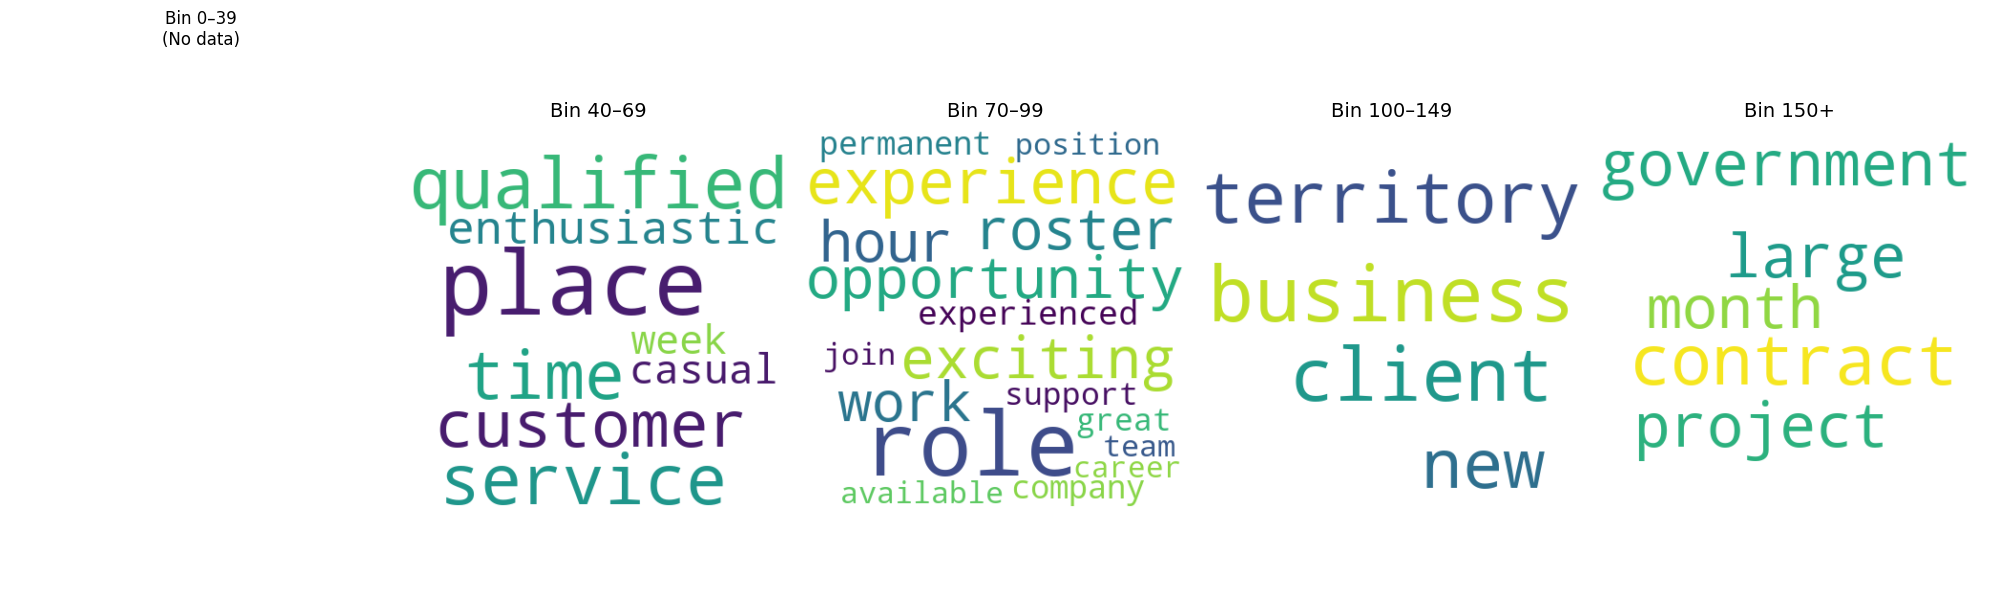

In [136]:
# Word Cloud per Salary Bin
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# กำหนด bin ใหม่ (หน่วย: $K)
bins = [0, 39, 69, 99, 149, float('inf')]
labels = ['0–39', '40–69', '70–99', '100–149', '150+']


# สร้าง Salary Bin
salary_by_kw['SalaryBin'] = pd.cut(salary_by_kw['AvgSalary'], bins=bins, labels=labels)

# วาด wordcloud per bin
fig, axes = plt.subplots(1, len(labels), figsize=(20, 6))

for i, bin_label in enumerate(labels):
    bin_data = salary_by_kw[salary_by_kw['SalaryBin'] == bin_label]
    
    # ข้ามถ้าไม่มีคำ
    if bin_data.empty:
        axes[i].axis('off')
        axes[i].set_title(f'Bin {bin_label}\n(No data)', fontsize=12)
        continue

    # เตรียม dict: {word: AvgSalary}
    word_dict = dict(zip(bin_data['Keyword'], bin_data['AvgSalary']))
    
    # สร้าง wordcloud
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(word_dict)
    
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'Bin {bin_label}', fontsize=14)
    axes[i].axis('off')

plt.tight_layout()
plt.show()